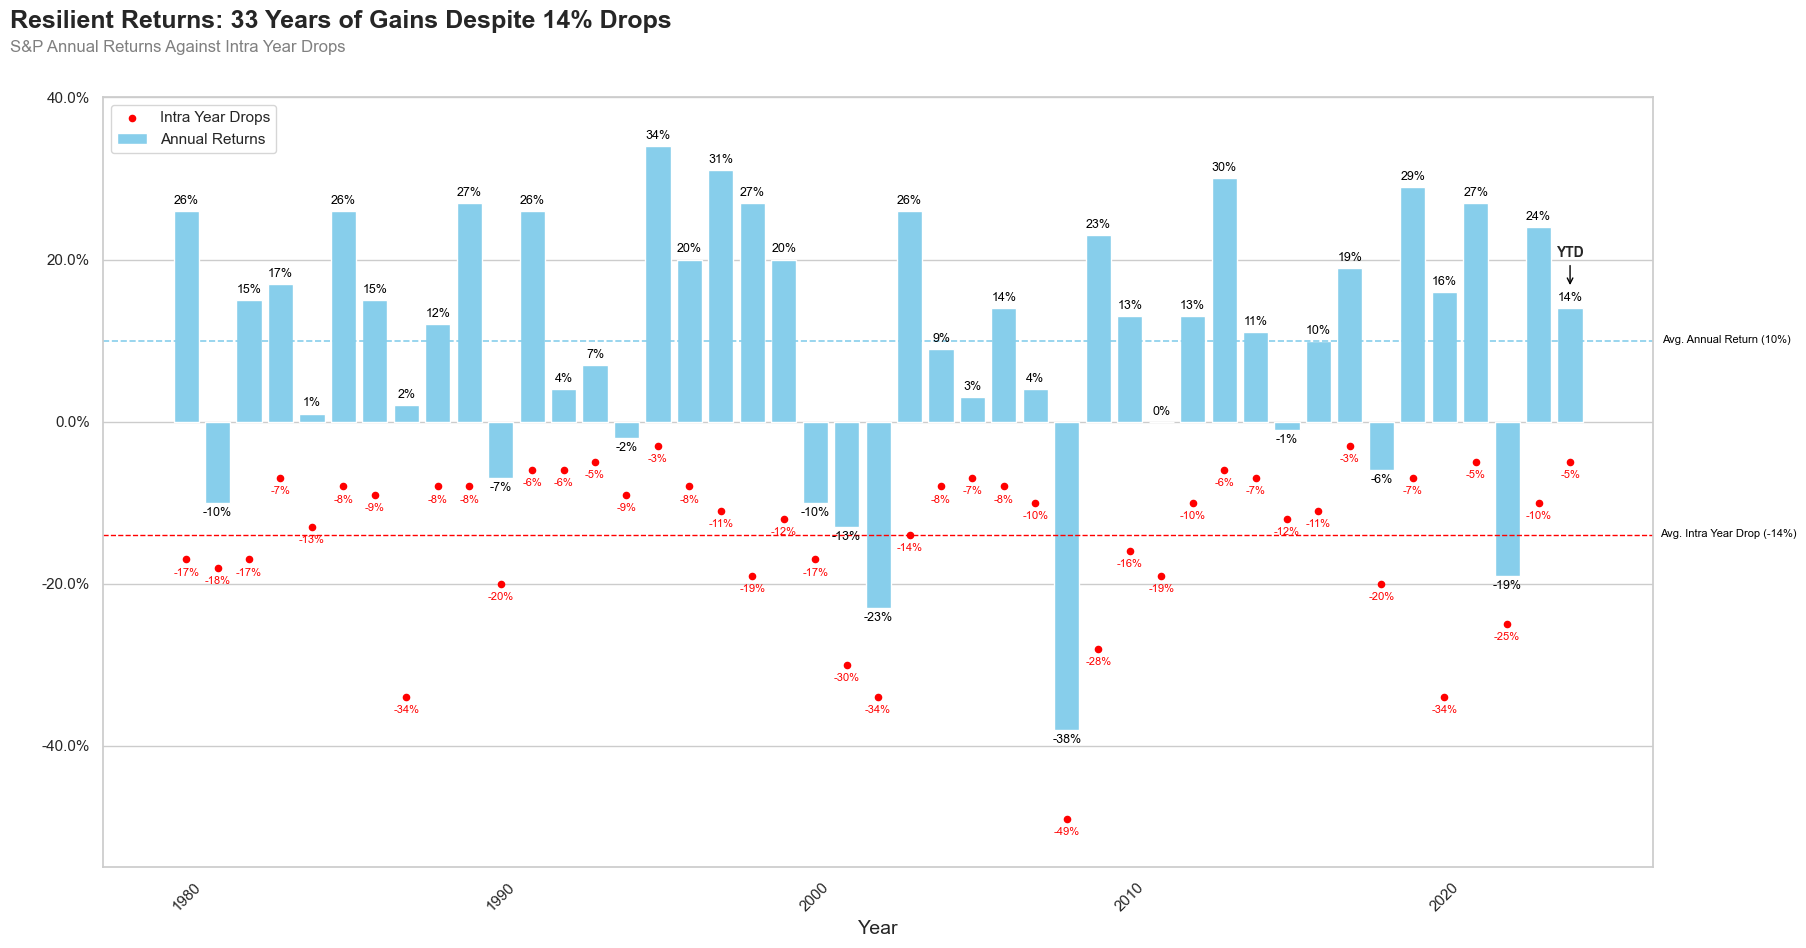

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


df = pd.read_csv('sa_assign1.csv')

def percentage_formatter(x, pos):
    return f'{x}%'

sns.set_theme(style="whitegrid")


fig, ax = plt.subplots(figsize=(20, 10))


bars = ax.bar(df['Year'], df['Annual Returns'], color='skyblue', label='Annual Returns')


scatter = ax.scatter(df['Year'], df['Intra Year Drops'], color='red', label='Intra Year Drops', s=20, zorder=5)

ax.set_title('Resilient Returns: 33 Years of Gains Despite 14% Drops', 
             fontsize=18, fontweight='bold',loc='left', pad=50, x=-0.06)


ax.text(x=df['Year'].min()-5.6, y=ax.get_ylim()[1] +9,
        s='S&P Annual Returns Against Intra Year Drops',
        ha='left', va='top', fontsize=12, color='gray')
ax.set_ylim(-55,40)

ax.set_xlabel('Year', fontsize=14)


ax.grid(axis='x')
ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

for bar in bars:
    yval = bar.get_height()
    if yval >= 0:
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval}%', ha='center', va='bottom', fontsize=9, color='black')
    else:
        ax.text(bar.get_x() + bar.get_width()/2, yval - 0.5, f'{yval}%', ha='center', va='top', fontsize=9, color='black')

for i in range(len(df)):
    ax.text(df['Year'][i], df['Intra Year Drops'][i] - 1, f'{df["Intra Year Drops"][i]}%', 
            ha='center', va='top', fontsize=8, color='red')

ax.axhline(y=-14, color='red', linestyle='--', linewidth=1)  
ax.axhline(y=10, color='skyblue', linestyle='--', linewidth=1.2)

ax.text(x=df['Year'].max()+7.2, y=-14-0.5 , s='Avg. Intra Year Drop (-14%)', color='black', ha='right', va='bottom', fontsize=8)
ax.text(x=df['Year'].max()+7, y=10-0.5 , s='Avg. Annual Return (10%)', color='black', ha='right', va='bottom', fontsize=8)

last_bar = bars[-1]
last_bar_height = last_bar.get_height()
last_bar_x = last_bar.get_x() + last_bar.get_width() / 2

ax.annotate('YTD', 
            xy=(last_bar_x, last_bar_height+2.5), 
            xytext=(last_bar_x, last_bar_height + 6),
            textcoords='data',
            ha='center', va='bottom',
            fontsize=10, fontweight='bold',
            arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->', linewidth=1))


plt.xticks(rotation=45)

ax.legend(loc='upper left')

plt.savefig('output.jpg', format='jpg', dpi=300, bbox_inches='tight')

plt.show()
